In [1]:
# Importing pandas 
import pandas as pd

#Now we load the dataset
df= pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
#For Linear regression we need a clean dataset, so
df= pd.get_dummies(df, drop_first=True)

# Now we check for the missing values
df.isnull().sum()


price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [ ]:
#Splitting the data for training and then testing
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
Y= df['price']

#Code for splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)


In [ ]:
#Now we train the model with the X_train and Y_train
#We put the training data into an object called LinearRegression
from sklearn.linear_model import LinearRegression

print(X_train.dtypes)
print(X_train.isnull().sum())
print(Y_train.isnull().sum())

#We see that scikit only works with numeric values. 
#So we must convert them to numeric




area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
0


In [21]:
#First let's see the data types


print(df.dtypes)

# OR filter object columns only
object_columns = df.select_dtypes(include='object').columns
print("Object columns:", object_columns)


price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_yes                        bool
guestroom_yes                       bool
basement_yes                        bool
hotwaterheating_yes                 bool
airconditioning_yes                 bool
prefarea_yes                        bool
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object
Object columns: Index([], dtype='object')


In [22]:
#Conversion of objects using one-hot encoding

df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [ ]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes, whether they are correct or not
print(X_train.shape, y_train.shape)


(436, 13) (436,)


In [24]:
#As we already imported LinearRegression, We can continuse to train with the data.


model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')


MAE: 970043.4039201637
MSE: 1754318687330.6643
R² Score: 0.6529242642153184


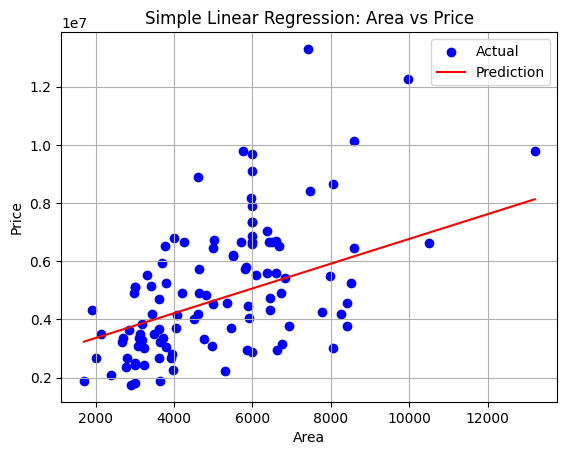

In [28]:
import matplotlib.pyplot as plt

# Use only 'area' for simple linear regression
X_area = df[['area']]
y_price = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X_area, y_price, test_size=0.2, random_state=42)

# Train
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Sort for plotting
sorted_idx = X_test['area'].argsort()

# Plot
plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.plot(X_test['area'].iloc[sorted_idx], y_pred[sorted_idx], color='red', label='Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.grid(True)
plt.show()

